# <font color=#FFCC66> Preprocessamento </font>

- df.shape
- df.info()
- df.describe()
- sns.countplot(df.feature, normalize=True)

##  <font color=#33CC66> Dimension Reduction </font>

##  <font color=#33CC66> Engenharia de Features </font>

###  <font color=#33FFFF> Feature Scaling </font>

##### Mais sensíveis:  
Otimização:
- Regressão Linear
- Regressao Logística
- Redes Neurais

Distância:
- SVM
- KNN
- K-means

##### Menos sensíveis:  
- Arvore de Decisão
- Randon Forest
  
#### Tipos
##### Standardization (Padronização - Quantos desvios padrões da média)
* Preferência sobre a normalização por contar com desvios padrões e reconhecimento de possíveis outliers
* <b> Sempre fitar o modelo DEPOIS do split do dataset </b>
<br> Assim, não é vazado informação de teste para o treino
* (valor - média) / (desvio padrão)

```python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    x_train_std = scaler.fit_transform(x_train) # z_scaler - O fit salva a média e o desvio padrão para aplicar a Padronização
    x_val_std = scaler.transform(x_val) # aplicar a padronização
```
##### Normalization (Valor / Valor_Max)

* É muito mais sensível a outlier por considerar valores de borda
* (valor - min) / (max - min)

```python
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    scaler = scaler.fit(x_train) # 
    print(scaler.data_max, scaler.data_min)
    x_val_std = scaler.transform(x_val) # aplicar a padronização
```

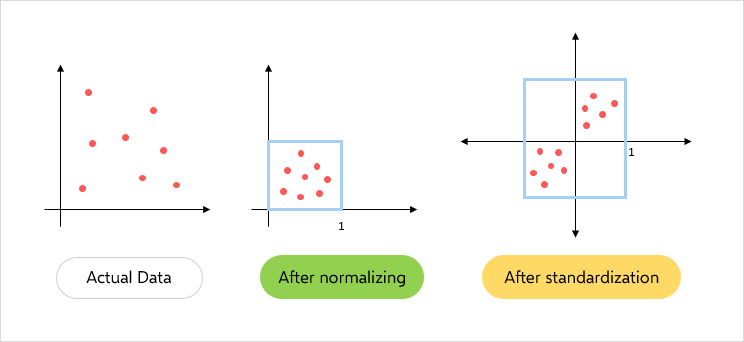

### <font color=#33FFFF> Categorização de Feature </font>

#### OneHotEncode ou GetDummies

- Criação de uma feature para cada categoria

```python
    from sklearn.preprocessing import OneHotEncoder

    hot = OneHotEncoder()
    y_train = hot.fit_transform(y_train)
    y_test = hot.transform(y_test)
```

#### Label Encoder

- A categorização se mantém em uma única feature, porém cada uma delas é atrelada a um valor numérico SEQUENCIAL
- Tal ordenação pode gerar certos problemas de "ordem" entre as categorias 
- Normalmente os algorítimos baseados em distância sofrem com essa categorização (KNN, K-Means, Regressão Logística)

Ex: Níveis de Escolaridade

```python
    df.col = df.col.replace[{'label1':0, 'label2':1, 'label3':2}]
```

#### Discretização

- Criar rótulos que agrupam as categorias
- Dessa forma transforma dados contínuos em discretizados

<b> Hiperparâmetros
- n_bins: quantidade de agrupamentos
- strategy: "uniform", "quantile" (percentil), "kmeans"

```python
    from sklearn.preprocessing import KBinsDiscretizer
    disc = KBinsDiscretizer(n_bins= 5, strategy= 'uniform', encode= 'ordinal')
    dados_transf = disc.fit_transform(X[['column']])
    dados_transf.flatten()
    X['bins'] = dados_transf
```

### <font color=#33FFFF> Dados Faltantes </font>

* Verificar o percentual de relevância de <b> Dados Faltantes </b>
* Verificar quantos dados faltantes existem na linha
* Sempre buscar a área de negócios para entender o comportamento dos dados

* Uma opção é preencher com algum valor e adicionar uma coluna booleana de dado faltante

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'constant', fill_value= -1)
imputer = imputer.fit(X[[column, ..., n_cols]])
X[column] = imputer.transform(X[[column, ..., n_cols]])
```

<font color=#CCCCFF> Média </font><br>
<font color=#CCCCFF> Mediana </font><br>
<font color=#CCCCFF> Moda </font><br>

Opções:<br>
<font color=#CCCCFF> KNNImputer </font><br>
<font color=#CCCCFF> IterativeImputer </font><br>


### <font color=#33FFFF> Binarização </font>

* Modificar as features de forma a otimizar resultados
* Definir um threshold e cria uma feature nova classificando se o valor está acima ou abaixo

```python
from sklearn.preprocessing import Binarizer

imputer = Binarizer(threshold= value)
imputer = imputer.fit(X[[column, ..., n_cols]])
dados_transformados = imputer.transform(X[[column, ..., n_cols]])

X[column] = pd.Series(dados_transformados[0])
```

# <font color=#FFCC66> Estrutura de um Modelo de Machine Learning </font>

* FALL BACK!! Variáveis para derrubar o modelo

<img src="https://cdn-images-1.medium.com/max/1000/1*ZiYvylk60EY2XG7ck1lqJA.png" width=500>

- **Conjunto de dados de treino**: são os dados utilizados para a construção do modelo, os dados que o modelo utilizará "para aprender";


- **Conjunto de dados de validação**: conjunto de dados usados para testar o modelo e aprimorar a sua performance, seja na seleção de hyperparâmetros/seleção de modelo;


- **Treinamento do modelo**: é a etapa em que cálculos matemáticos são feitos para que a equação que descreve o modelo seja criada! É assim que "o modelo aprende!";


- **Seleção de hiperparâmetros/seleção de modelo**: etapa em que os hiperperâmetros que constituem o modelo são selecionados. Aqui, técnicas como **grid search** e **cross validation** são muito importantes! Falaremos disso mais tarde.


- **Conjunto de dados de teste**: conjunto de dados utilizado para testar o modelo após ele ter sido treinado. Essa é a melhor forma de simular o modelo em produção ou podemos dizer "na vida real", onde o nosso modelo será testado com dados que ele nunca viu;


- **Avaliação**: forma de avaliar a performance do modelo. Há várias métricas e formas diferentes de avaliação, que conheceremos melhor mais tarde.



## <font color=#33CC66> Particionamento de Base </font>

### <font color=#33FFFF> Holdout (Split Train Test) </font>

```python
    from sklearn.model_selection import train_test_split

    X = df.drop(columns=target)
    y = df.target
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=y)
```

### <font color=#33FFFF> Cross-Validation </font>

- Realiza k treinamentos (alternando a base de treinamento em k vezes)
- Método de particionamento de dados iterativo
- A base de treino é dividida entre treino e validação diversas vezes para garantir maior quantidade de ambiente de treino
- Vantagens: garante que o desempenho do algoritmo será bom independente da seleção dos dados de validação
- Comum para validar os parâmetros do modelo (Grid Search e Random Search)

```python
    from sklearn.model_selection import cross_validate
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state= 42)
    cv_results = cross_validate(clf, x_train, y_train, cv=5, scoring=['mean_squared_error', 'accuracy_score'], return_train_score= True)
    print(cv_results['test_mean_squared_error'])
    print(cv_results['train_accuracy_score'])
```

## <font color=#33CC66> Tunagem de Modelo </font>

### <font color=#33FFFF> Grid e Random Search </font>

<b> ESTATÍSTICAMENTE O RANDOM SEARCH É MELHOR </b>
<br>Isso, pois quando existem muitos hiperparam, acertar aleatóriamente os mais impactantes vale mais que rodar todos um por um


* Hiperparâmetro: valores de configuração do modelo
* Parâmetro: valores a serem aprendidos pelo modelo

* Caputrar os valores de Hiperparâmetros
    <br> model.get_params()
* Primeiro utilizar a busca para <b>encontrar</b> os hiperparâmetros
* Em seguida, utilizar eles para criar o modelo


| Grid Search                             | Random Search                                     |
|-----------------------------------------|---------------------------------------------------|
| Preciso preparar e varrer todos valores | Varre alguns valores aleatoriamente               |
| Alto custo de tempo                     | Menor custo de tempo, pois não vamos varrer todos |
| Pode ser paralelizado                   | Pode ser paralelizado                             |
|                                         | Podemos otimizar (Não só para esse método)        |



#### GridSearch
```python
    from sklearn.Neighbors import KNeighborsClassifier
    from sklearn. import StandardScaler
    from sklearn.model_selection import GridSearchCV

    model = KNeighborsClassifier()
    X_std = scaler.fit_transform(X)
    espaco_hiperparm = {
        'n_neighbors': [13, 12, 11, 9, 5, 3, 1]
    }

    grid_search = GridSearchCV(model, espaco_hiperparm, cv=5)
    search = grid_search.fit(X_std, y_train)
    print(grid_search.best_params_)
    display(pd.DataFrame(grid_search.cv_results_))    
```

#### RandomSearch
* n_iter : quantidade de iterações a se realizar pelo modelo

```python
    from sklearn.Neighbors import KNeighborsClassifier
    import numpy as np
    from sklearn. import StandardScaler
    from sklearn.model_selection import RandomizeSearchCV

    model = KNeighborsClassifier()
    X_std = scaler.fit_transform(X)
    espaco_hiperparm = {
        'n_neighbors': np.arange(3, 11),
        'p': np.arange(1, 3) # Para grau arbitrário é usado Minkowski com p = n
    }

    rand_search = RandomizeSearchCV(model, espaco_hiperparm, cv=5, n_iter=n)
    search = rand_search.fit(X_std, y_train)
    print(rand_search.best_params_)
    display(pd.DataFrame(rand_search.cv_results_))

    guardar_dados = csv.params e csv.mean_test_score
```



### <font color=#33FFFF> Naive Bayes </font>

Ele tenta otimizar a pesquisa de hiperparâmetros a partir de probabilidade
<br>Dessa forma, flexiciona os hiperparâmetros e probabilisticamente busca a melhor combinação

Vamos relembrar da aula de Estatística e Probabilidade sobre a __Teoria Bayesiana__, onde:
    
<img src="https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg" width=600>

Mas para seguirmos a rigorosamente a Teoria Bayesiana, precisariamos saber todas as distribuição de probabilidade conjuntas e para estimarmos eles seria um bem trabalhoso. Uma forma __simples__ mas __ingênua__ (o que da o nome do modelo de __Naive Bayes__ é assumirmos que as variáveis que descrevem os atributos são __independentes!__
 
Partindo de uma para probabilidade "anterior" a priori, podemos chegar na "posterior" ou posteriori.

```python
    from skopt import BayesSearchCV
    from sklearn.Neighbors import KNeighborsClassifier
    import numpy as np
    from sklearn. import StandardScaler
    
    model = KNeighborsClassifier()
    X_std = scaler.fit_transform(X)
    espaco_hiperparm = {
        'n_neighbors': (3, 11),
        'p': (1, 3) # Para grau arbitrário é usado Minkowski com p = n
    }

    bayes_search = BayesSearchCV(model, espaco_hiperparm, cv=5, n_iter=n)
    search = bayes_search.fit(X_std, y_train)
    print(bayes_search.best_params_)
    display(pd.DataFrame(bayes_search.cv_results_))

    guardar_dados = csv.params e csv.mean_test_score

```

## <font color=#33CC66> Métricas de Avaliação </font>

```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
```

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Visto isso, as seguintes métricas numéricas de avaliação são bastante comuns na avaliação de modelos de classificação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo; <b> Predição Correta / Predição Total </b> (Problema com bases desbalanceadas)

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- <b> Predição 1 / (Predição Correta 1 + Predição Incorreta 1) </b> (Foca no Falso Positivo)

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- <b> Predição 1 / (Predição Correta 1 + Predição Incorreta 0) </b> (Foca no Falso Negativo)

- F1-Score: média harmônica de precision e recall. (Interessante como métrica única)

<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="400">

###  <font color=#33FFFF> Cálculo de Erro </font>

#### MAE (Erro Médio Absoluto)
- Média da diferença absoluta entre valor real e predito

    <img src="https://i.imgur.com/BmBC8VW.jpg" height="200" width="400">

#### MSE (Erro Médio Quadrático)
- Média da diferença quadrática entre valor real e predito

    <img src="https://i.imgur.com/vB3UAiH.jpg" height="200" width="400">

#### RMSE  (Raíz do Erro Médio Absoluto)
- Raíz da média da diferença quadrática entre valor real e predito

###  <font color=#33FFFF> Curva ROC-AUC </font>

* Curva Roc: Curva probabilistica
* Area Under the Curve (AUC): Medida numérica para comparação
<br><br>
-----------
* Métrica de avaliação cruzada com o intuito de permitir a comparação de desempenho entre modelos
* Variáveis consideradas: Taxa de <b>TP(VP)</b> e <b>FP(FP)</b>




#  <font color=#FFCC66> Supervisionados </font>

## <font color=#33CC66> Modelos de Classificação </font>

### <font color=#33FFFF> Regressão Logística </font>

- Utilizado quando a clasificação é binária
- Se apoia na probabilidade de uma função signoide e um threshold

```python
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
```

##### - Hiperparâmetros

 - Penalty
 - Max_iter
 - C
 - Solver

### <font color=#33FFFF>  Decision Tree </font>

```python
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,
                             max_depth=n) # A profundidade da árvore evita overfiting
dtc.get_params() # Apresentar como o modelo está parametrizado
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
```

##### - Hiperparâmetros

 - Criterion
 - Max_depht
 - Min_samples_split
 - Min_samples_leaf
 - Max_features

#### **- Critério de Gini ou Entropia**

##### **- Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

- $G(\text{p1}) = 1 - (\frac{p1_1}{p1_t}^2 + \frac{p1_2}{p1_t}^2)$

    <br>
- $G(\text{p2}) = 1 - ( \frac{p2_1}{p2_t}^2 + \frac{p2_2}{p2_t}^2)$

Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 

- $G(\text{médio-pós-divisão}) = \frac{p1}{p_t} \times G(\text{p1}) + \frac{p2}{p_t} \times G(\text{p2})$

Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:

- $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão})$



O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**. Portanto, quanto maior, melhor.

##### **- Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$
 
 
Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

    - $E(\text{p1}) = -1 \times (\frac{p1_1}{p1_t} \log_{2}\frac{p1_1}{p1_t} + \frac{p1_2}{p1_t} \log_{2}\frac{p1_2}{p1_t})$

        <br>
    - $E(\text{p2}) = -1 \times (\frac{p2_1}{p2_t} \log_{2}\frac{p2_1}{p2_t} + \frac{p2_2}{p2_t} \log_{2}\frac{p2_2}{p2_t})$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{p1}{p_t} \times E(\text{p1}) + \frac{p2}{p_t} \times E(\text{p2})$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão})$


**Qual escolher?**
- Calcular log é mais caro computacionalmente
- A "vantagem" logaritmica é justamente quando o valor percorre uma gama grande de valores

###  <font color=#33FFFF> KNN Classifier  </font>

Algoritmo de Classificação com embasamento na distância entre as amostras.
Dessa forma dentro de um raio de "K" vizinhos analisados é realizado a classificação da amostra nos labels disponíveis

* Problemas com normalização por considerar distâncias
* Sem aprendizado, a cada amostra nova o algoritmo é executado novamente

```python
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors:int, metric:str)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(y_test)
    classification_report(y_test, y_pred)
    confusion_matrix(y_test, y_pred)
```

#### Métricas de Distância
* Minkowski (p=2) [Generalização da distância Euclidiana]
* Euclidiano (p=2)
* Manhatam (p=n)
* Mahalanobis (p=2) [Normalização em relação à variância]
* Chebyshev (p=infinito quando vertical)

#### Otimizando o "K"
* Testar a acurácia entre treino e validação/teste
* Elbow Method (Focar na questão de minimização de erro)

###  <font color=#33FFFF> Naive Bayes  </font>

* Curvas Gaussianas, Multinomial, Bernoulli
* O modelo busca as chances de classificação que cada feature retorna
* Cada curva abaixo mostra a relação da feature com a classificação desejada (hue)
* É possível averiguar o peso utilizado para a classificação de cada feature

<img src=" 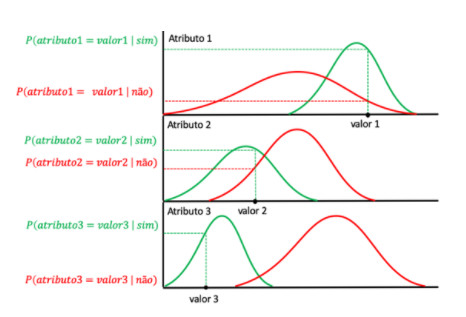" />

```python
    import pandas as pd
    from sklearn.naive_bayes import GaussianNB
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report

    df['Chance of Admit '] = np.where(df['Chance of Admit '] > 0.7, 1, 0)

    model = GaussianNB()
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
```

## <font color=#33CC66> Modelos de Regressão </font>

### Decision Tree Regression


* Regressão é o método estatístico para estimar o relacionamento entre duas variáveis (dependente/alvo e independente/preditoras)

### KNN Regression

Realiza a regresssão considerando todas as features de X como a variável independente
E a coluna y como variável dependente

<b> A Métrica Padrão de Erro é R² </b>

```python
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import r2_score

    knn_reg = KNeighborsRegressor(n_neighbors = k)
    knn_reg.fit(x_train, y_train)
    y_pred = knn_reg.pred(x_val)
    ## É possível buscar funções para plotar a relação do Valor Predito com o Real pelo seaborn
    r2_score(y_test, y_pred)
```

#  <font color=#FFCC66> Não Supervisionados </font>

## Modelos de Clusterização

#  <font color=#FFCC66> Data Visualization </font>

## Pair Plot

Função para comparar feature por feature e buscar as correlações da base

**O parâmetro "hue" é o discretizador da curva, ou seja, o seu target**

Dessa forma, é bom buscar o formato da distribuição da feature com ela mesma. Se as curvas do hue forem muito diferentes, podem trazer algum insight

- sns.pairplot(df, hue=label)

## CountPlot

- sns.countplot(feature, normalize=True)